#TODO
Global Ideas
1. Są Ip address które mają kilka fruadów ale to do sprawdzenia jak będzie słabo
    - Card bin podobny case, zmienna kategorialna ale wyrazona w liczbi, kilka tysiecy 

2. Usunięte zmienne moze jakis frequency encoding (jak bedzie slabo)
3. **Variable selection**

4. Bez komplikacji raczej wbudowanych na twardo reguł.

Next to do:
1. Stworzenie pliku, do oceny modeli.


____

If your dataset contains a mix of numeric and non-numeric columns and you want to perform outlier detection on it, you need to preprocess the data appropriately to handle both types of features. Here's a general approach you can take:

Preprocess Non-Numeric Features: Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.
Preprocess Numeric Features: Normalize numeric variables to ensure they are on a similar scale.
Combine Preprocessing Steps: Use ColumnTransformer from scikit-learn to apply different preprocessing steps to numeric and non-numeric columns simultaneously.
Apply Outlier Detection Algorithm: Once the data is preprocessed, apply an outlier detection algorithm such as Local Outlier Factor (LOF), Isolation Forest, or any other suitable method.
Identify and Filter Outliers: Based on the outlier detection results, filter out the outliers from your dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
pd.set_option('display.max_columns', None)

# Loading data

In [4]:
path = os.getcwd() + '/data/fraud_challenge_150k.csv'
data = pd.read_csv(path)

# Exploration

In [5]:
data.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,billing_state,card_bin,currency,cvv,signature_image,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,California,40771.0,cad,D,F,U,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,Florida,24480.0,cad,X,X,H,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,Utah,37778.0,cad,X,Q,X,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,Virginia,55790.0,usd,G,G,C,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,South Carolina,37370.0,cad,X,F,F,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [7]:
data.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'user_agent', 'email_domain',
       'phone_number', 'billing_city', 'billing_postal', 'billing_state',
       'card_bin', 'currency', 'cvv', 'signature_image', 'transaction_type',
       'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name',
       'billing_address', 'merchant_id', 'locale', 'tranaction_initiate',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

The max and min values look ok in every column, all of the other statistics look ok too.

In [8]:
data.describe()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
count,149892.000000,149870.000000,149886.000000,149885.000000,149876.000000,149872.000000,149864.000000,149872.000000
mean,4645.751995,2521.458944,54.202434,4702.200033,50190.088160,41837.521512,49.866392,7998.025275
std,1153.816155,604.524161,10.070401,1188.476704,28378.078852,10080.587192,29.204766,4047.071560
min,1.000000,5.000000,1.000000,50.000000,503.000000,6040.000000,0.000000,1000.000000
25%,3824.000000,2103.000000,48.000000,3872.000000,25314.000000,35386.000000,24.000000,4487.000000
50%,4667.000000,2544.000000,55.000000,4730.000000,50117.000000,42086.000000,50.000000,8002.000000
75%,5476.000000,2951.000000,61.000000,5548.000000,74338.000000,47374.000000,75.000000,11494.000000
max,9119.000000,4999.000000,99.000000,9999.000000,99950.000000,67639.000000,100.000000,15000.000000


Examination of each column
Columns that look like ID columns are being delted in next step.

In [9]:
data['merchant_id'].value_counts()

merchant_id
353-07-5210    2
041-79-6765    2
019-07-8261    2
536-40-1783    2
186-34-1525    2
              ..
804-11-5257    1
472-10-1587    1
254-23-4703    1
657-88-1513    1
319-72-0066    1
Name: count, Length: 149883, dtype: int64

### Deletion of ID colummns.

In [10]:
df = data.drop(columns=['applicant_name','phone_number','applicant_name',
                        'billing_address', 'merchant_id', 'cvv',
                        'email_domain', 'EVENT_TIMESTAMP','ip_address',
                        'billing_city','billing_postal','billing_state',
                        'card_bin', 'locale'])

### Target variable examination

In [11]:
df['EVENT_LABEL'].value_counts()

EVENT_LABEL
legit    141836
fraud      8164
Name: count, dtype: int64

# IMPORTANT STEP

In [12]:
df['EVENT_LABEL'] = [0 if x == 'legit' else 1 for x in df['EVENT_LABEL']]

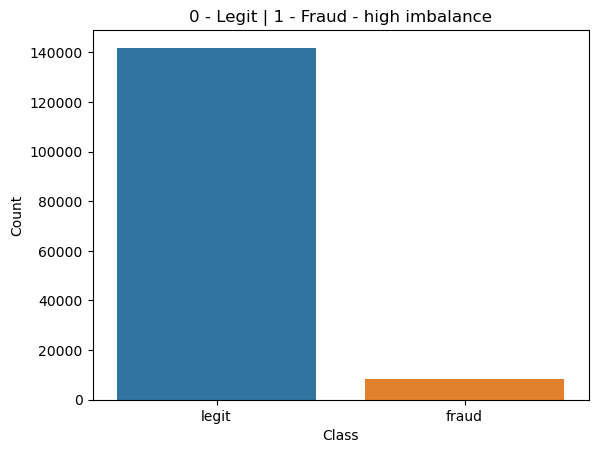

In [13]:
sns.countplot(data, x='EVENT_LABEL')
plt.title('0 - Legit | 1 - Fraud - high imbalance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [14]:
all_rows = df['EVENT_LABEL'].count()
fraud_rows = df['EVENT_LABEL'].sum()
legit_rows = all_rows - fraud_rows
print(f'There is {round((fraud_rows/all_rows)*100, 2)}% of fraud transactions, which is {fraud_rows} transactions.')
print(f'There is {round((legit_rows/all_rows)*100, 2)}% of legit transactions, which is {legit_rows} transactions.')

There is 5.44% of fraud transactions, which is 8164 transactions.
There is 94.56% of legit transactions, which is 141836 transactions.


#### Outliers identification

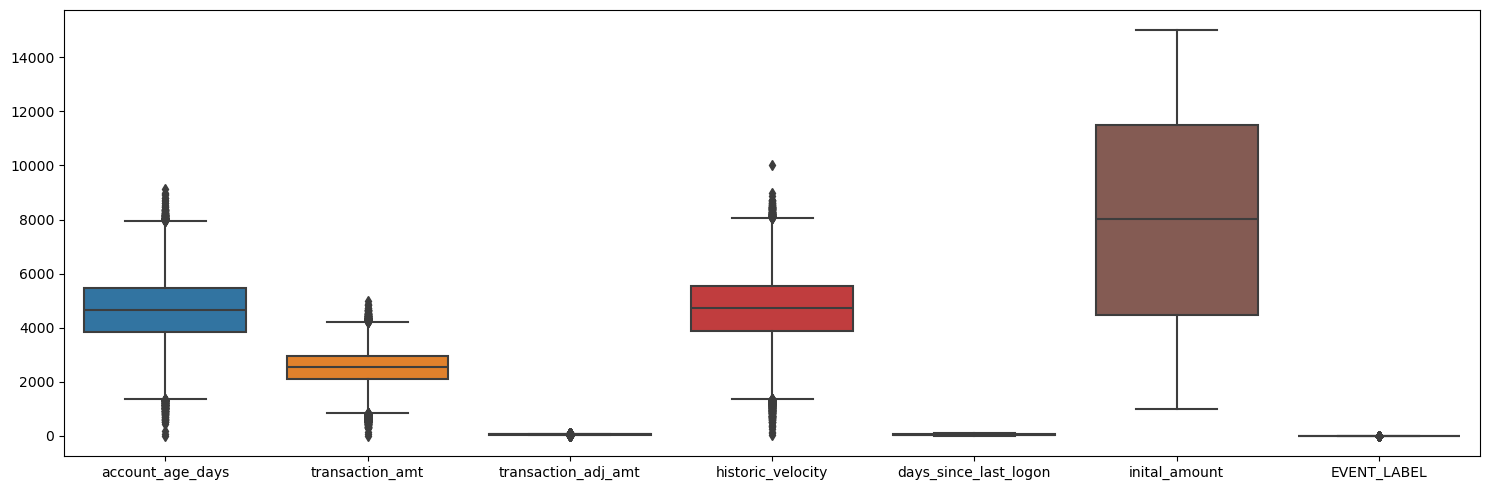

In [15]:
plt.figure().set_size_inches(15,5)
sns.boxplot(df)
plt.tight_layout() 
plt.show()

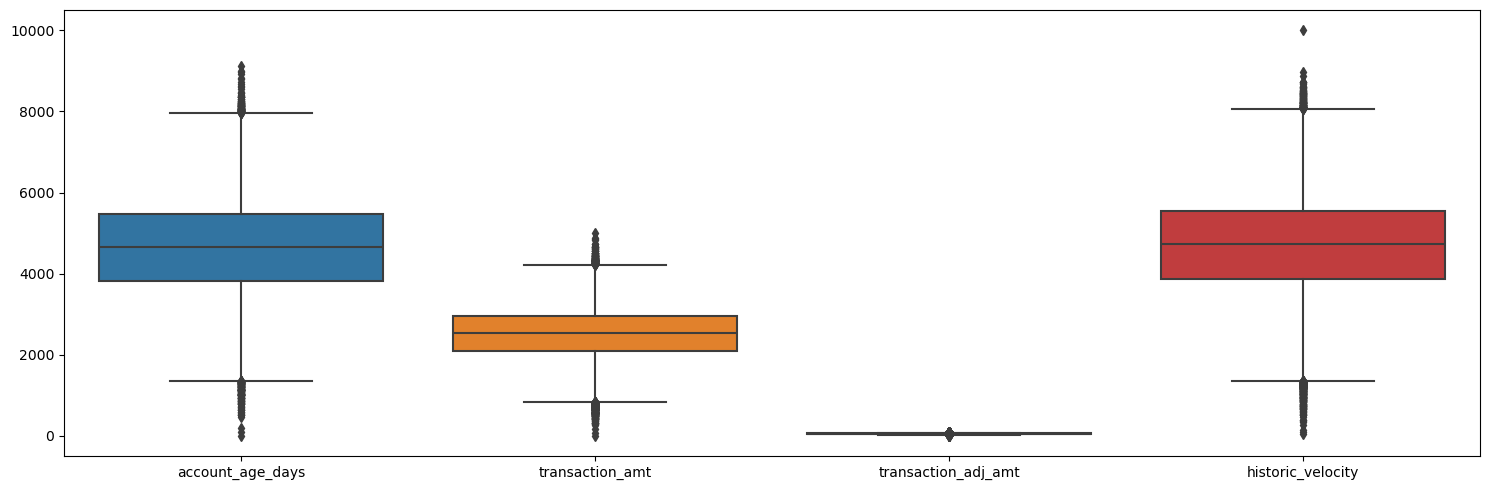

In [16]:
df_pom = df[['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity']]
plt.figure().set_size_inches(15,5)
sns.boxplot(data = df_pom)
plt.tight_layout() 
plt.show()

#### Closer look at outliers.

In [17]:
df['historic_velocity'].sort_values(ascending=False)

19948     9999.0
123899    8975.0
54531     8875.0
1979      8736.0
91495     8735.0
           ...  
139613       NaN
140716       NaN
146280       NaN
149446       NaN
149906       NaN
Name: historic_velocity, Length: 150000, dtype: float64

In [52]:
test = pd.DataFrame(df['historic_velocity'].value_counts()).reset_index()
test.sort_values(ascending=False, by='historic_velocity').head(20)
test[test['historic_velocity']>9000]

,historic_velocity,count
6606,9999.0,1


#### Distribution of variables
Most of them has normal distribution, besides days since last logon and initial amount. They have uniform distribution.

/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/seaborn/_oldcore.py

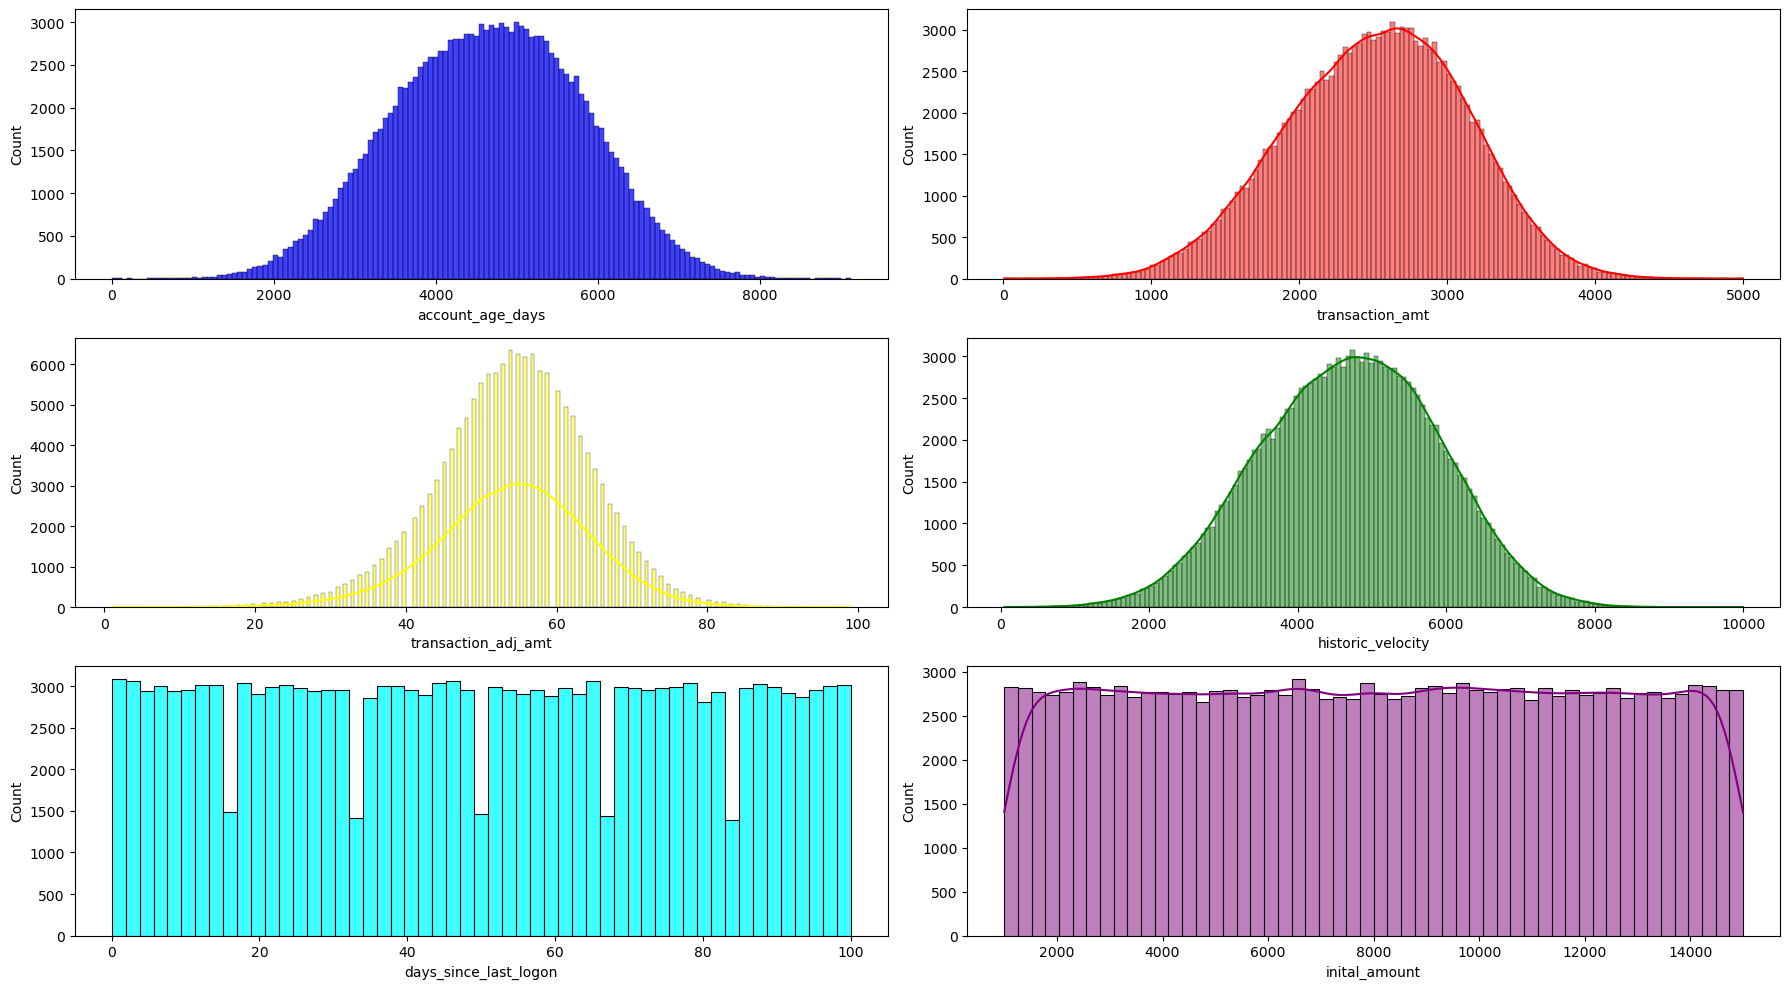

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(18, 10))

sns.histplot(df['account_age_days'], ax=axs[0,0], color='blue')
sns.histplot(df['transaction_amt'], kde=True,ax=axs[0,1], color='red')
sns.histplot(df['transaction_adj_amt'], kde=True,ax=axs[1,0], color='yellow')
sns.histplot(df['historic_velocity'], kde=True,ax=axs[1,1], color='green')
sns.histplot(df['days_since_last_logon'],ax=axs[2,0], color='cyan')
sns.histplot(df['inital_amount'], kde=True,ax=axs[2,1], color='purple')



plt.tight_layout()
plt.show()

#### Identifying rows, that has NA values somewhere and also if they were classified as fraud with NA.

Perecent of missing values in both groups, fraud and legit are really low, so it is sensible to do data imputation in some cases, because bias introduced to data shouldn't be very high.

In [20]:
df.isna().sum()
df_nas = df[df.isna().any(axis=1)]
print(df_nas.isna().sum())
print(df_nas.shape)
print(f'Percent of missing data: {round(100*df_nas.shape[0]/df.shape[0],2)}%')

account_age_days         108
transaction_amt          130
transaction_adj_amt      114
historic_velocity        115
user_agent               113
currency                 108
signature_image          105
transaction_type         116
transaction_env          123
tranaction_initiate      126
days_since_last_logon    136
inital_amount            128
EVENT_LABEL                0
dtype: int64
(1422, 13)
Percent of missing data: 0.95%


In [21]:
fraud_amt = df[df['EVENT_LABEL']==1]
missing_rows = df[df.isna().any(axis=1)]
missing_fraud = missing_rows[missing_rows['EVENT_LABEL'] == 1]
print(missing_fraud.isna().sum())
print(missing_fraud.shape)
print(f'Percent of missing data in fraud group: {round(100*missing_fraud.shape[0]/fraud_amt.shape[0],2)}%')

account_age_days          6
transaction_amt           8
transaction_adj_amt      10
historic_velocity         3
user_agent                7
currency                  7
signature_image           7
transaction_type          5
transaction_env           2
tranaction_initiate       4
days_since_last_logon     9
inital_amount            10
EVENT_LABEL               0
dtype: int64
(78, 13)
Percent of missing data in fraud group: 0.96%


Change of categorical variables missing data to 'Unknown' lables to reduce amount of rows reduced in next step (deletion of rows with missing values in them.)

In [22]:
df['user_agent'] = df['user_agent'].fillna("Unknown")
df['currency'] = df['currency'].fillna("UNK")
df['signature_image'] = df['signature_image'].fillna("UN")
df['transaction_type'] = df['transaction_type'].fillna("UN")
df['transaction_env'] = df['transaction_env'].fillna("UN")
df['tranaction_initiate'] = df['tranaction_initiate'].fillna("UN")


In [23]:
sh_check = df[df.isna().any(axis=1)]
print(sh_check.shape)
print(f'Percent of missing data: {sh_check.shape[0]/df.shape[0]*100}%')

(731, 13)
Percent of missing data: 0.4873333333333334%


In [24]:
df = df.dropna()

In [25]:
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,user_agent,currency,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,cad,F,U,X,O,59.0,13646.0,0
1,2714.0,2045.0,48.0,4517.0,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,cad,X,H,W,J,0.0,11930.0,0
2,6987.0,2892.0,61.0,5007.0,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,cad,Q,X,X,T,83.0,7412.0,0
3,2712.0,3040.0,28.0,6022.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,usd,G,C,N,M,24.0,4623.0,0
4,3598.0,2976.0,66.0,2600.0,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,cad,F,F,G,K,21.0,1905.0,0


#### Browser and system extraction

In [26]:
df['browser']=df['user_agent'].str.split('/').str[0]
df['os']=df['user_agent'].str.split('/').str[1].str.split('(').str[1]


In [27]:
df['os'] = df['os'].astype(str)

In [28]:
def os_selection(row):
    if 'Windows' in row['os']:
         return 'Windows'
    elif 'Linux' in row['os']:
        return 'Linux'
    elif 'Macintosh' in row['os']:
        return 'Macintosh'
    elif 'iPhone' in row['os']:
        return 'iPhone'
    elif 'iPod' in row['os']:
        return 'iPod'
    elif 'Android' in row['os']:
        return 'Android'
    elif 'iPad' in row['os']:
        return 'iPad'
    else:
        return 'Other'

In [29]:
df['os_test'] = df.apply(os_selection, axis=1)

In [30]:
df = df.drop(columns=['os','user_agent'])

In [31]:
df.rename(columns={'os_test':'os'}, inplace=True)

account_age_days
days_since_last_logon
locale


- acc_age = 1 - ponizej 1000 dni
- acc_age = 8 - ponizej 8000 dni
- acc_age = 9 - powyzej 8000 dni

In [32]:
df['acc_age'] = pd.cut(x=df['account_age_days'], 
                       bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9200],
                       labels=['1', '2', '3', '4', '5', '6', '7', '8', '9'])
df['d_last_logon'] = pd.cut(x=df['days_since_last_logon'],
                            bins=[0, 20, 40, 60, 80, 100],
                            labels=['1', '2', '3', '4', '5'],
                            include_lowest=True)

In [33]:
type_counts = {col: {'int': 0, 'float': 0, 'str': 0} for col in df.columns}
# Iterate over each column
for col in df.columns:
    # Iterate over unique values in the column
    for value in df[col].unique():
        # Check the data type of each value and update counts accordingly
        if isinstance(value, int):
            type_counts[col]['int'] += 1
        elif isinstance(value, float):
            type_counts[col]['float'] += 1
        elif isinstance(value, str):
            type_counts[col]['str'] += 1

# Print the counts for each column
for col, counts in type_counts.items():
    print(f"Column '{col}':")
    print("Integers:", counts['int'])
    print("Floats:", counts['float'])
    print("Strings:", counts['str'])
    print()

Column 'account_age_days':
Integers: 0
Floats: 6474
Strings: 0

Column 'transaction_amt':
Integers: 0
Floats: 3691
Strings: 0

Column 'transaction_adj_amt':
Integers: 0
Floats: 92
Strings: 0

Column 'historic_velocity':
Integers: 0
Floats: 6756
Strings: 0

Column 'currency':
Integers: 0
Floats: 0
Strings: 4

Column 'signature_image':
Integers: 0
Floats: 0
Strings: 27

Column 'transaction_type':
Integers: 0
Floats: 0
Strings: 27

Column 'transaction_env':
Integers: 0
Floats: 0
Strings: 27

Column 'tranaction_initiate':
Integers: 0
Floats: 0
Strings: 27

Column 'days_since_last_logon':
Integers: 0
Floats: 101
Strings: 0

Column 'inital_amount':
Integers: 0
Floats: 14001
Strings: 0

Column 'EVENT_LABEL':
Integers: 0
Floats: 0
Strings: 0

Column 'browser':
Integers: 0
Floats: 0
Strings: 3

Column 'os':
Integers: 0
Floats: 0
Strings: 7

Column 'acc_age':
Integers: 0
Floats: 0
Strings: 9

Column 'd_last_logon':
Integers: 0
Floats: 0
Strings: 5



In [34]:
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,currency,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL,browser,os,acc_age,d_last_logon
0,3371.0,2167.0,56.0,2572.0,cad,F,U,X,O,59.0,13646.0,0,Opera,Windows,4,3
1,2714.0,2045.0,48.0,4517.0,cad,X,H,W,J,0.0,11930.0,0,Opera,Linux,3,1
2,6987.0,2892.0,61.0,5007.0,cad,Q,X,X,T,83.0,7412.0,0,Mozilla,Linux,7,5
3,2712.0,3040.0,28.0,6022.0,usd,G,C,N,M,24.0,4623.0,0,Mozilla,Macintosh,3,2
4,3598.0,2976.0,66.0,2600.0,cad,F,F,G,K,21.0,1905.0,0,Mozilla,Linux,4,2
